In [1]:
#importing all packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#reading the data set
df = pd.read_csv("/content/drive/My Drive/StudentsPerformance (1).csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
#checking data type for each column
df.dtypes 

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [5]:
df.shape

(1000, 8)

In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


The features described in the above data set are:
1. Count tells us the number of NoN-empty rows in a feature.
2. Mean tells us the mean value of that feature.
3. Std tells us the Standard Deviation Value of that feature.
4. Min tells us the minimum value of that feature.
5. 25%, 50%, and 75% are the percentile/quartile of each features.
6. Max tells us the maximum value of that feature.

In [7]:
#checking for missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

no missing value so no need to drop data

**FREQUENCY**

In [8]:
df.iloc[:,0].value_counts()

female    518
male      482
Name: gender, dtype: int64

more females than males

In [9]:
df.iloc[:,1].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

######group C has the most members compared to the others

In [10]:
df.iloc[:,2].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [11]:
df.iloc[:,3].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [12]:
df.iloc[:,4].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

 total number of people who did not complete the course was double that of those who completed the course

In [13]:
male = df[df['gender'] == 'male']
female = df[df['gender'] != 'male']

print("Math Score")
print("Male    :",round(male['math score'].sum()/len(male),2))
print("Female  :",round(female['math score'].sum()/len(female),2),'\n')

print("Reading Score")
print("Male    :",round(male['reading score'].sum()/len(male),2))
print("Female  :",round(female['reading score'].sum()/len(female),2),'\n')

print("Writing Score")
print("Male    :",round(male['writing score'].sum()/len(male),2))
print("Female  :",round(female['writing score'].sum()/len(female),2))

Math Score
Male    : 68.73
Female  : 63.63 

Reading Score
Male    : 65.47
Female  : 72.61 

Writing Score
Male    : 63.31
Female  : 72.47


Male students are good in math. Female students are good in writing and reading.


In [0]:
passmark = 40

How many students passed in Math exam ?

In [15]:
df['Math_PassStatus'] = np.where(df['math score']<passmark, 'F', 'P')
df.Math_PassStatus.value_counts()

P    960
F     40
Name: Math_PassStatus, dtype: int64

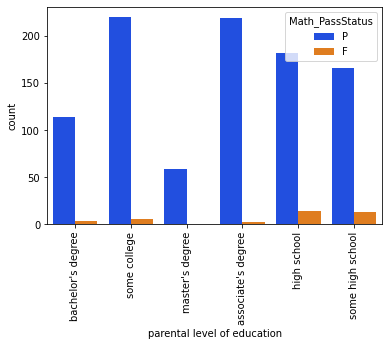

In [16]:
p = sns.countplot(x='parental level of education', data = df, hue='Math_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

How many studends passed in reading ?

In [17]:
df['Reading_PassStatus'] = np.where(df['reading score']<passmark, 'F', 'P')
df.Reading_PassStatus.value_counts()

P    974
F     26
Name: Reading_PassStatus, dtype: int64

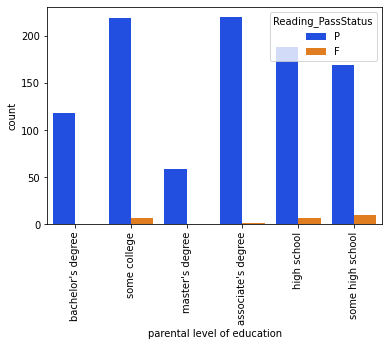

In [18]:
p = sns.countplot(x='parental level of education', data = df, hue='Reading_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

How many students passed writing ?

In [19]:
df['Writing_PassStatus'] = np.where(df['writing score']<passmark, 'F', 'P')
df.Writing_PassStatus.value_counts()

P    968
F     32
Name: Writing_PassStatus, dtype: int64

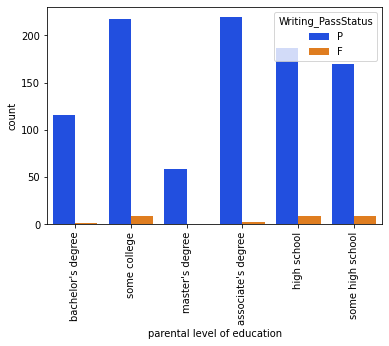

In [20]:
p = sns.countplot(x='parental level of education', data = df, hue='Writing_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 


How many students passed in all the subjects ?


In [21]:
df['OverAll_PassStatus'] = df.apply(lambda x : 'F' if x['Math_PassStatus'] == 'F' or x['Reading_PassStatus'] == 'F' or x['Writing_PassStatus'] == 'F' else 'P', axis =1)
df.OverAll_PassStatus.value_counts()

P    949
F     51
Name: OverAll_PassStatus, dtype: int64

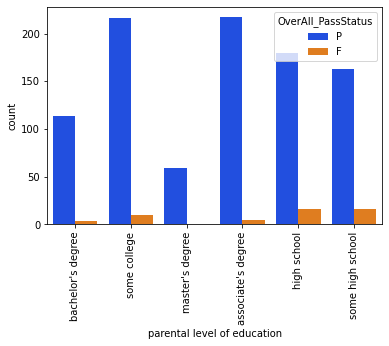

In [22]:
p = sns.countplot(x='parental level of education', data = df, hue='OverAll_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

finding percentage

In [0]:
df['Total_Marks'] = df['math score']+df['reading score']+df['writing score']
df['Percentage'] = df['Total_Marks']/3

grading

In [24]:
def GetGrade(Percentage, OverAll_PassStatus):
    if ( OverAll_PassStatus == 'F'):
        return 'F'    
    if ( Percentage >= 80 ):
        return 'A'
    if ( Percentage >= 70):
        return 'B'
    if ( Percentage >= 60):
        return 'C'
    if ( Percentage >= 50):
        return 'D'
    if ( Percentage >= 40):
        return 'E'
    else: 
        return 'F'

df['Grade'] = df.apply(lambda x : GetGrade(x['Percentage'], x['OverAll_PassStatus']), axis=1)

df.Grade.value_counts()


B    261
C    256
A    198
D    178
E     56
F     51
Name: Grade, dtype: int64

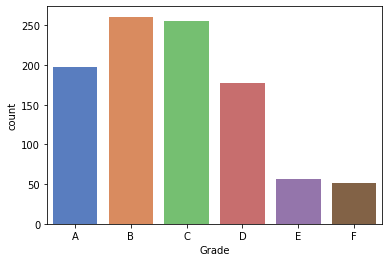

In [25]:
sns.countplot(x="Grade", data = df, order=['A','B','C','D','E','F'],  palette="muted")
plt.show()

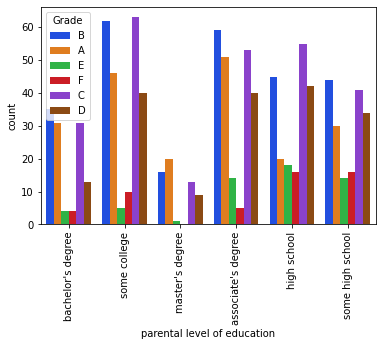

In [26]:
p = sns.countplot(x='parental level of education', data = df, hue='Grade', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 